## Regression Code

USA                               487
China                             158
France                             95
India                              67
Russia                             54
Kazakhstan                         46
Japan                              40
New Zealand                        13
Gran Canaria                        2
Yellow Sea                          1
Pacific Missile Range Facility      1
Name: Country, dtype: int64


/Users/caoguangjing/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/caoguangjing/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


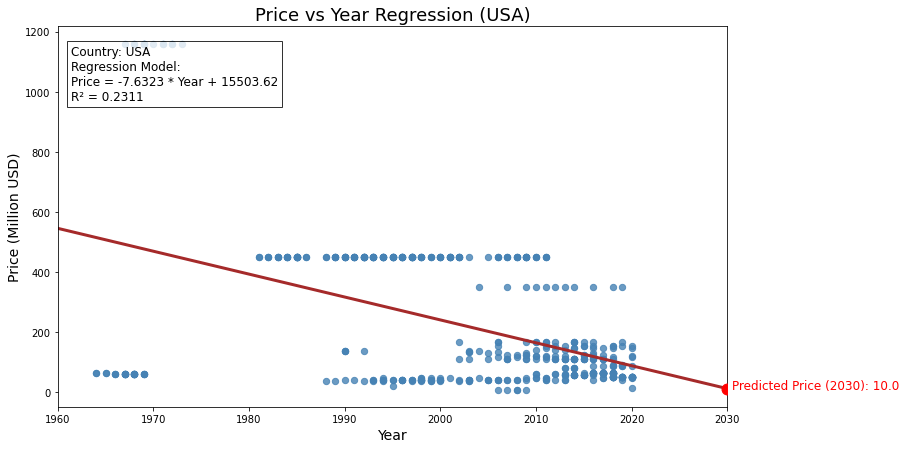

Predicted price for 2030: 9.97


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/GuangjingCao/2025B_WPI_DS3010_Final_Project_Group10/main/mission_launches.csv"
df = pd.read_csv(url)

df = df.dropna(subset=['Price'])

def robust_parse(x):
    """Parse any date format gracefully."""
    try:
        x = str(x).replace("UTC", "").replace("GMT", "").strip()
        return parser.parse(x, fuzzy=True)
    except:
        return pd.NaT

df["Date_clean"] = df["Date"].apply(robust_parse)

df["Date_clean"] = pd.to_datetime(df["Date_clean"], errors="coerce")

df["Year"] = df["Date_clean"].dt.year

df['Price'] = df['Price'].astype(str).str.replace(",", "", regex=False)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Country'] = df['Location'].apply( lambda x: x.split(',')[-1].strip())

print(df['Country'].value_counts())

# -------------------------------
# 1. Filter country (variable)
# -------------------------------
country_name = "USA"     # <---- change here
df_2 = df[df['Country'] == country_name].dropna(subset=['Year','Price'])
# print(df_2.describe())
# print(df_2.shape)

# -------------------------------
# 2. Regression
# -------------------------------
X = df_2[['Year']]
y = df_2['Price']

model = LinearRegression().fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)   # <-- R²

# Regression line (1960–2030)
year_range = np.arange(1960, 2031).reshape(-1,1) # <-- change the range of the year here
y_pred_line = model.predict(year_range)

# -------------------------------
# 3. Plotting
# -------------------------------
plt.figure(figsize=(12,7))

plt.scatter(df_2['Year'], df_2['Price'], color='steelblue', s=40, alpha=0.8)
plt.plot(year_range, y_pred_line, color='brown', linewidth=3)

plt.xlim(1960, 2030)    # <---- set the range of the year

plt.xlabel("Year", fontsize=14)
plt.ylabel("Price (Million USD)", fontsize=14)
plt.title(f"Price vs Year Regression ({country_name})", fontsize=18)

# -------------------------------
# 4. Add equation, R² in the graph
# -------------------------------
equation_text = (
    f"Country: {country_name}\n"
    f"Regression Model:\n"
    f"Price = {coef:.4f} * Year + {intercept:.2f}\n"
    f"R² = {r2:.4f}"
)

plt.text(
    0.02, 0.95,
    equation_text,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

# -------------------------------
# 5. Predict a target year (user input)
# -------------------------------
predict_year = 2030    # <---- change the predict of the year here
pred_price = model.predict([[predict_year]])[0]

# mark predicted point
plt.scatter(predict_year, pred_price, color="red", s=120, zorder=5)
plt.text(
    predict_year + 0.5, pred_price,
    f"Predicted Price ({predict_year}): {pred_price:.1f}",
    fontsize=12, color="red"
)

plt.show()

print(f"Predicted price for {predict_year}: {pred_price:.2f}")